### SETUP

MOVE UP ONE FOLDER

In [1]:
%cd ..

/Users/vjs/Lab/stacker


IMPORTS

In [2]:
import numpy as np
from dasp.algorithms import *
from dasp.visualizations import *


%load_ext autoreload
%autoreload 2
%matplotlib widget

### SINE WAVE CREATION

Numerical Output

signal: 
[ 0.00000000e+00  3.18171739e+01  3.15759549e-04 ... -3.15759547e-04
 -3.18171739e+01  9.16459988e-13]
Time: 
[0.00000000e+00 1.00010001e-04 2.00020002e-04 ... 9.99799980e-01
 9.99899990e-01 1.00000000e+00]


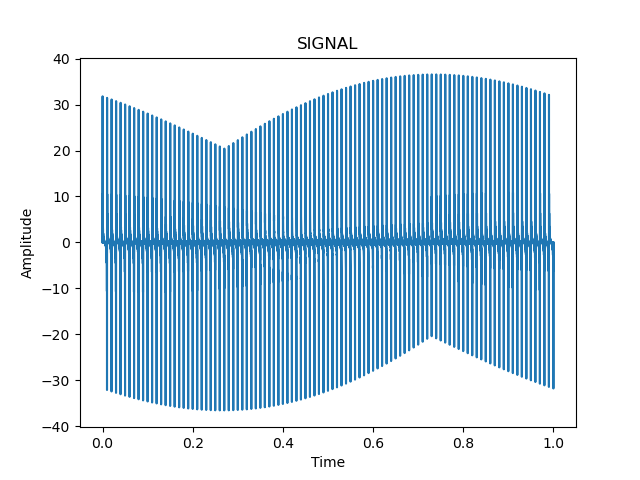

In [3]:
base_frequency = 100  # frequency in hertz
sample_rate = 10_000  # samples per second
duration = 1  # duration of the signal in seconds
wave_type = "base"  # options: "base", "square", "sawtooth", "triangle"
num_signals = 1  # number of signals to include as part of the same sine wave
signal_noise = 0  # scale from 0 to 1

# create signal
signal, time = sine_wave_creator(
    base_freq=base_frequency,
    sample_rate=sample_rate,
    duration=duration,
    wave_type=wave_type,
    num_signals=num_signals,
    noise=signal_noise,
)

print("signal: ")
print(signal)
print("Time: ")
print(time)

# -- example for plotting the created signal
sig_fig, sig_ax = plt.subplots()
sig_ax.set_title("SIGNAL")
sig_fig.canvas.header_visible = False
sig_fig.canvas.footer_visible = False
sig_ax.set_xlabel("Time")
sig_ax.set_ylabel("Amplitude")
sig_ax.plot(time, signal)

Interactive visualization

interactive(children=(IntSlider(value=10, description='base_freq', max=20, min=1), IntSlider(value=1000, descr…

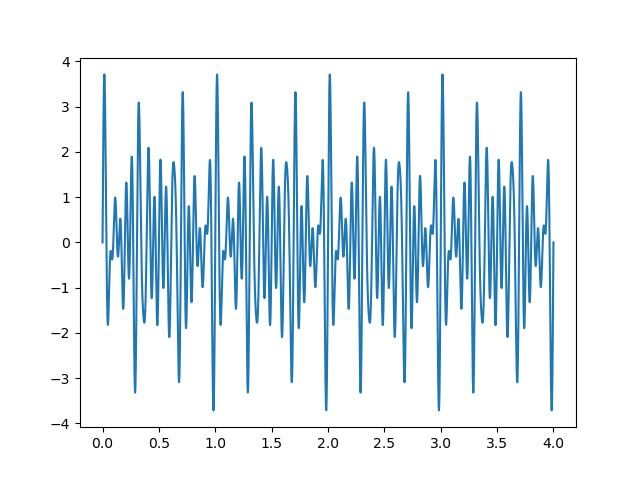

In [4]:
sig_viewer(
    base_freq=10,
    sample_rate=1000,
    duration=1,
    harmonics=0,
    wave_type="base",
    num_signals=4,
)

### Frequency Aligned Signal Projection (FASP)

FASP Array

In [5]:
fasp_array = fasp(signal=signal, num_ffts=np.floor(np.sqrt(signal.size / 2)), use_row_norm=True, use_im_norm=True)

print("FASP Array: ")
print(fasp_array)

FASP Array: 
[[0.64468367 0.48844859 0.10806051 ... 0.0837799  0.1200831  0.15137178]
 [0.62577069 0.47998267 0.1028844  ... 0.079269   0.11534508 0.13888391]
 [0.63465508 0.57583082 0.14844454 ... 0.10257948 0.15397605 0.16963454]
 ...
 [0.64167762 0.49316253 0.16913312 ... 0.15664983 0.17995754 0.20372088]
 [0.64715935 0.49491108 0.16951948 ... 0.15710666 0.18031691 0.20482557]
 [0.09586321 0.13486151 0.14026285 ... 0.12180071 0.14137405 0.16337791]]


Interactive visualization

In [6]:
fasp_viz(raw_signal=signal)

### Horizontally Aligned Signal Projection (HASP)
* Note, these algorithms work with the FFT of the raw signal

Generate FFT

In [7]:
fft = gen_fft(signal)

print("fft: ")
print(fft)

fft: 
[4.03721499e-02 8.07515064e-02 1.21145292e-01 ... 5.53244249e+02
 2.25119098e+03 6.23679354e+03]


HASP arrays

In [11]:
fixed_hasp_array = hasp_fixed(
    sample_rate=sample_rate,
    fft=fft,
    bandwidth=base_frequency,  # base_frequency is the max bandwidth, this is to avoid overlap
    freq_center=base_frequency,
    use_row_norm=True,
    use_im_norm=True,
)

decimating_hasp_array = hasp_decim(
    sample_rate=sample_rate,
    fft=fft,
    bandwidth=base_frequency,  # base_frequency is the max bandwidth, this is to avoid overlap
    freq_center=base_frequency,
    use_row_norm=True,
    use_im_norm=True,
)

interpolating_hasp_array = hasp_interp(
    sample_rate=sample_rate,
    fft=fft,
    bandwidth=base_frequency,  # base_frequency is the max bandwidth, this is to avoid overlap
    freq_center=base_frequency,
    use_row_norm=True,
    use_im_norm=True,
)

print("Fixed HASP: ")
print(fixed_hasp_array)
print("Decimating HASP: ")
print(decimating_hasp_array)
print("Interpolating HASP: ")
print(interpolating_hasp_array)

Fixed HASP: 
[[4.34593258e-06 4.29943719e-06 4.22314997e-06 ... 5.89122370e-06
  5.80740053e-06 5.74402936e-06]
 [8.11912288e-06 8.03108665e-06 7.89156956e-06 ... 1.03672277e-05
  1.02190850e-05 1.01132337e-05]
 [9.07154031e-06 8.98079758e-06 8.83181184e-06 ... 1.07392222e-05
  1.05871448e-05 1.04738850e-05]
 ...
 [5.94724772e-06 7.51813606e-06 7.57659601e-06 ... 2.24031979e-05
  2.26045395e-05 2.23116512e-05]
 [7.32937471e-06 8.47651614e-06 8.35388715e-06 ... 5.65815573e-05
  5.81407982e-05 5.90832288e-05]
 [8.08695852e-06 9.07607300e-06 8.94326001e-06 ... 4.72265102e-05
  4.87006332e-05 4.96168278e-05]]
Decimating HASP: 
[[4.34593258e-06 4.29943719e-06 4.22314997e-06 ... 5.89122370e-06
  5.80740053e-06 5.74402936e-06]
 [8.11912288e-06 8.03108665e-06 7.89156956e-06 ... 1.03672277e-05
  1.02190850e-05 1.01132337e-05]
 [9.07154031e-06 8.98079758e-06 8.83181184e-06 ... 1.07392222e-05
  1.05871448e-05 1.04738850e-05]
 ...
 [5.94724772e-06 7.51813606e-06 7.57659601e-06 ... 2.24031979e-05
 

Interactive visualization

In [9]:
hasp_viz(signal = signal, freq_center = base_frequency, sample_rate=sample_rate)

### HASP Interactive Dashboard

In [10]:
HASP_dash(base_freq = 100, sample_rate = 2000, duration = 1, noise = 0, bandwidth = 100, num_signals=1)